## Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of final weight

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This is the complete dataset and in this dataset we can see that there are both continuous and categorical data.

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


First 5 rows of the dataset

In [4]:
df.shape

(32560, 15)

This dataset contains 32560 rows and 15 columns.

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in this dataset

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Studying the different columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we can see that there are 9 columns with categorical data and 6 columns with continuous data.

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can observe following things from above statistics:

- Age, Fnlwgt, Education_num and Hours_per_week columns will have normal distribution since mean is greater than std values.

- mean and 50% values are almost same for Age, Fnlwgt, Education_num, Hours_per_week columns

- Outliers presence are possible in Capital_gain and Capital_loss columns since the difference between 75% and max is very high and also other columns might have outliers too.

In [11]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


# DATA VISUALIZATION

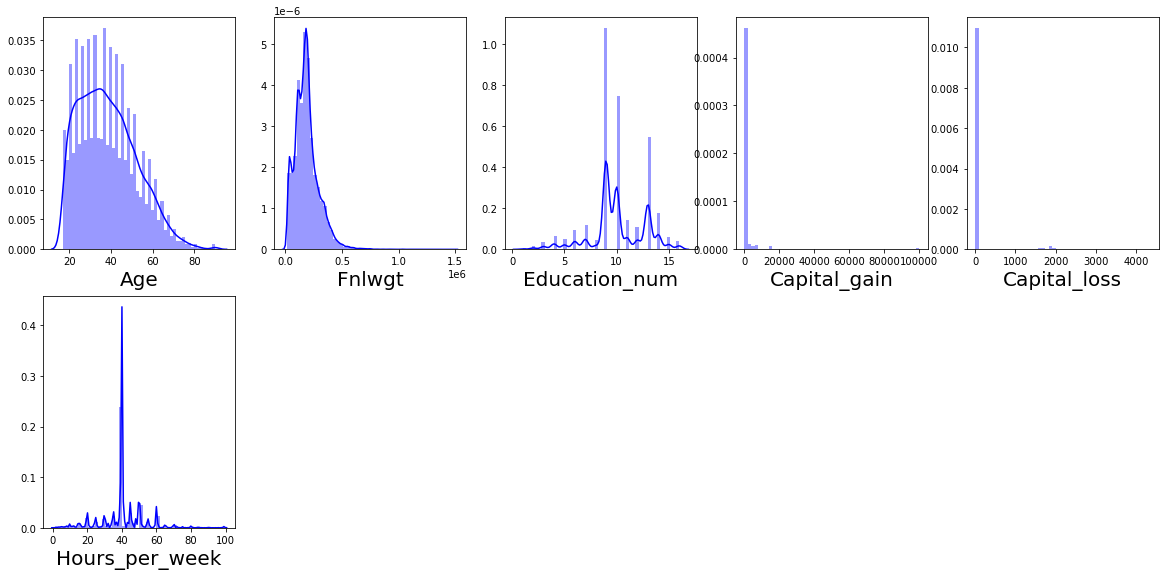

In [13]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in df.drop(columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income'], axis = 1):
    if plot_number <=35:
        plt.subplot(7,5,plot_number)
        sns.distplot(df[i], color = 'blue')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From this we can see that there might be some skewness in some of the columns

In [14]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

The only two column which are in the range of -0.50 to +0.50 are "Education_num" and "Hours_per_week".

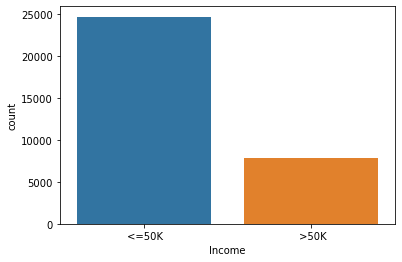

In [15]:
sns.countplot(df['Income'])

In [16]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

The total number of count with people with income less than 50k and more than 50k is shown above

There might also be class imbalance

In [17]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

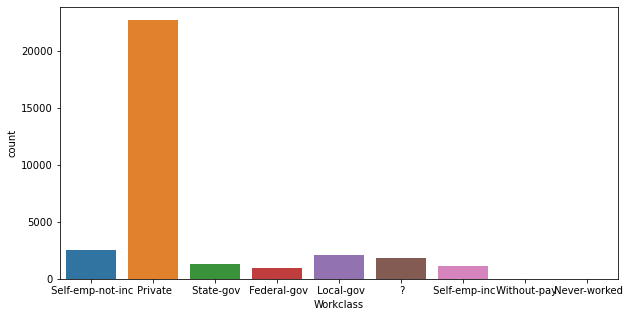

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['Workclass'])

Private is majority, followed by Self-emp-not-inc and Never-worked is least.

In [19]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

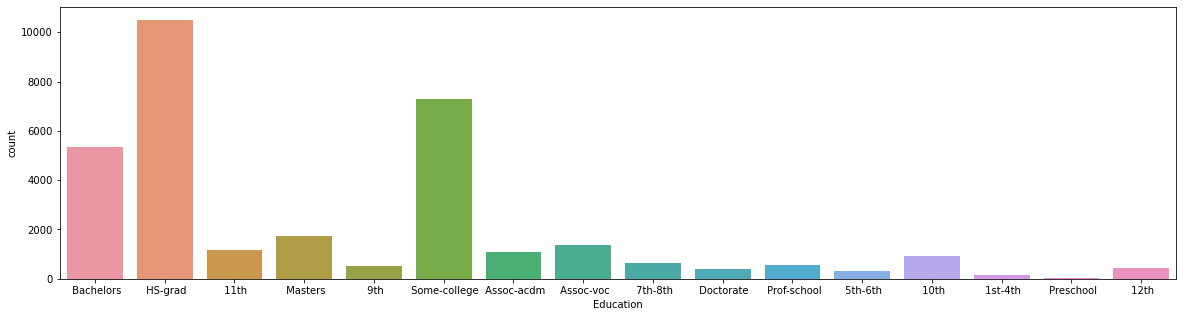

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(df['Education'])

We have 16 unique values for Education.HS-grad is majority, followed by Some-college and Preschool is the least.

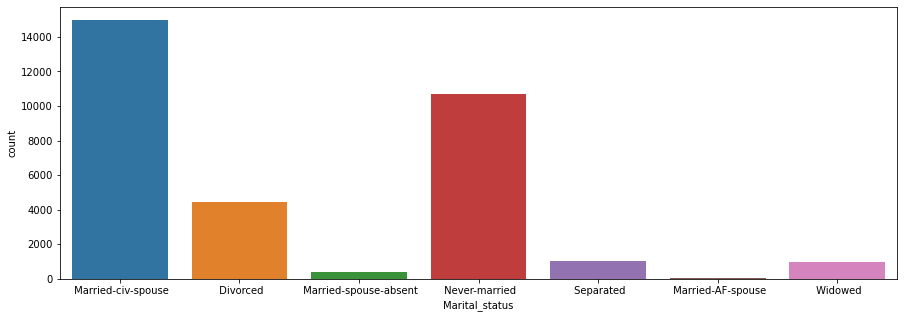

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df['Marital_status'])

We have 7 unique values for Marital_status.Married-civ-spouse is majority, followed by Never-married and Married-AF-spouse is the least.

In [24]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

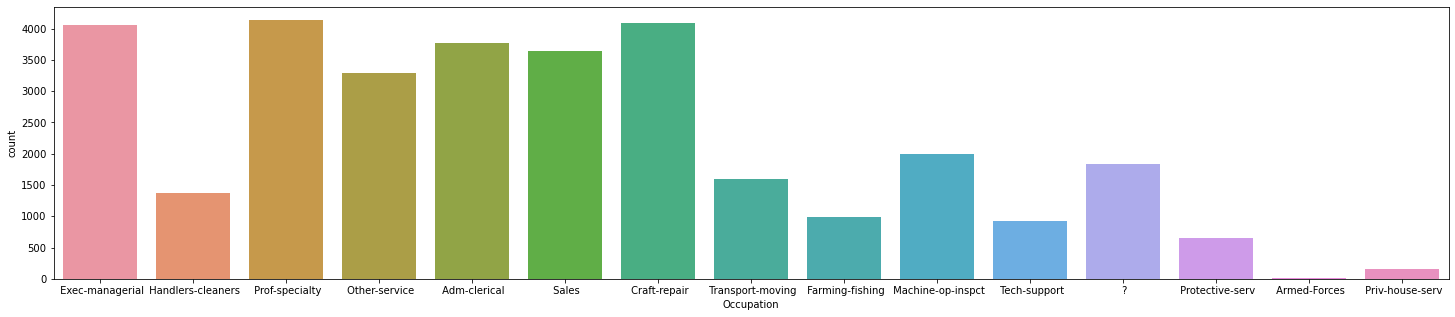

In [25]:
plt.figure(figsize=(25,5))
sns.countplot(df['Occupation'])

We have 17 unique values for Occupation.Majority are Prof-specialty followed by Craft-repair and Exec-managerial. Armed-Forces are least

In [26]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

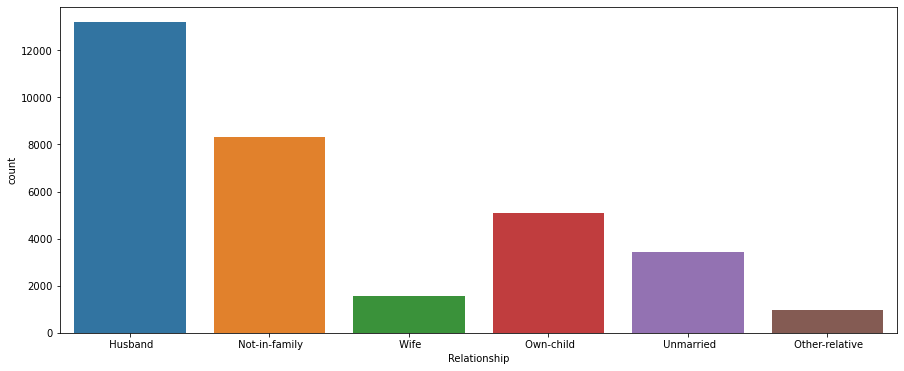

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df['Relationship'])

We have 6 unique values for Relationship. Majority of the people are Husbands followed by Not-in-family and Minority people are Other-relative.

In [28]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

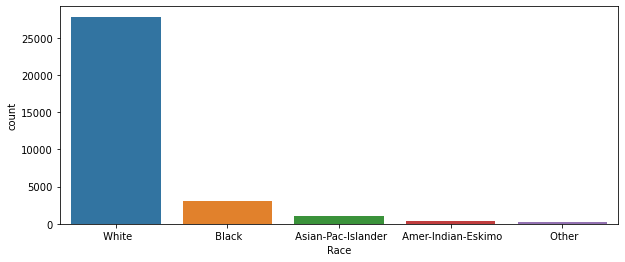

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(df['Race'])

We have 5 unique values under Race.Majority of the people are of White Race followed Black Race.

In [30]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

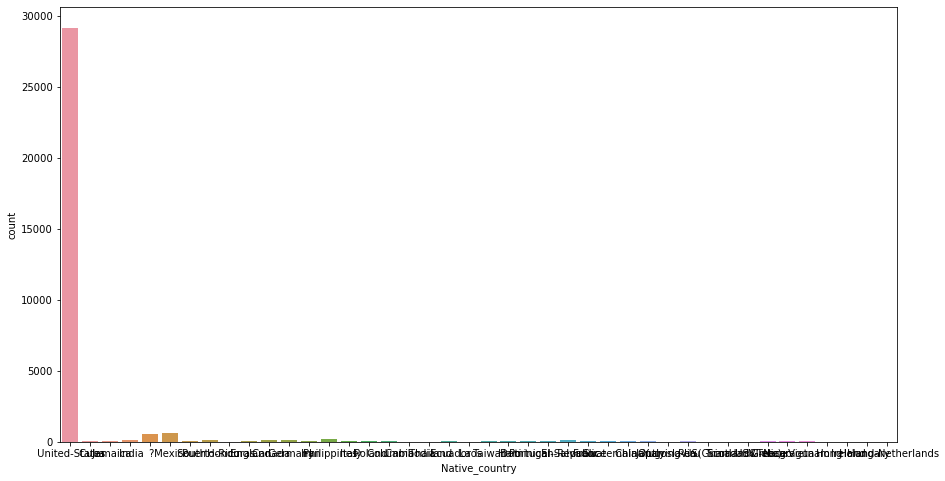

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(df['Native_country'])

We have 42 unique values under Native_country.Majority (nearly 90%) of the people are United-States Native followed by Mexico.

In [32]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

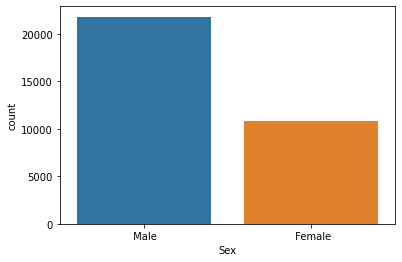

In [33]:
sns.countplot(df['Sex'])

Males are more than Females by nearly 50%

## Relationship between dependent and independent variable

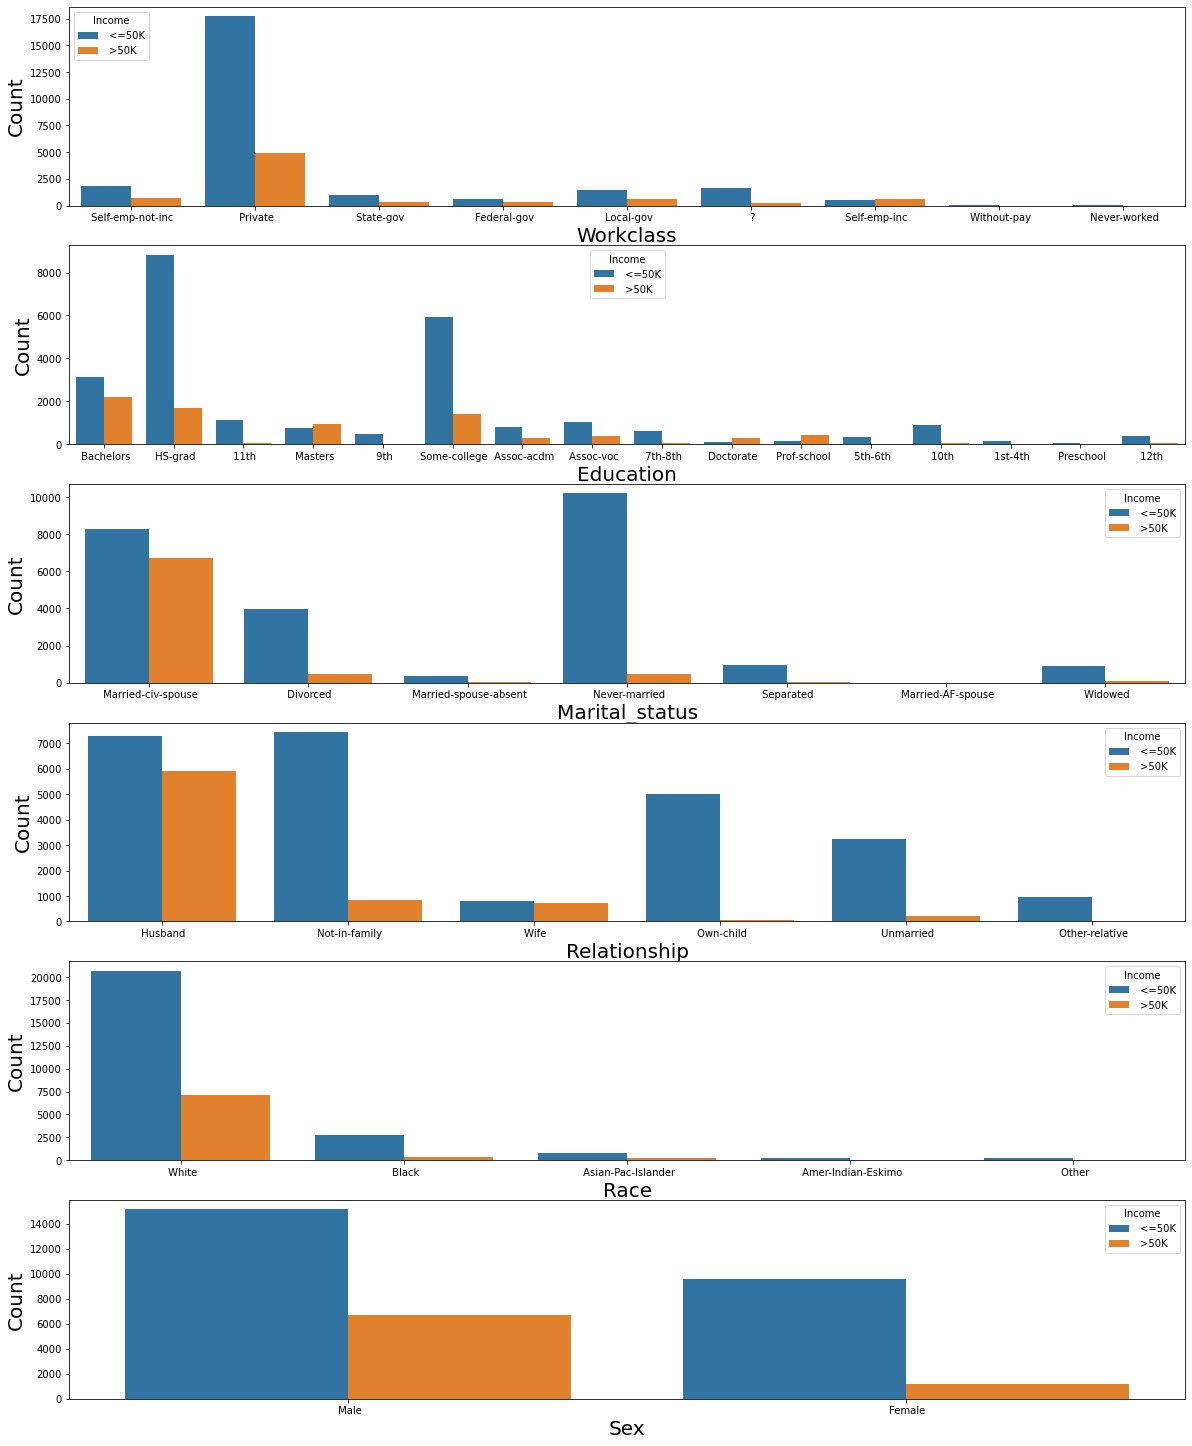

In [34]:
plt.figure(figsize=(20,30),facecolor='white')
plot_number2=1
x_plot2 = df[['Workclass', 'Education', 'Marital_status', 'Relationship', 'Race', 'Sex']]
y_plot2 = df['Income']
for i in x_plot2:
    if plot_number2<=len(x_plot2.columns):
        ax2=plt.subplot(7,1,plot_number2)
        sns.countplot(x_plot2[i], hue=y_plot2)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_number2+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph:

- Workclass - Private Employees are high in earning >50K and also they are high in earning less than <=50K due to the majority of the people fall under private employment. In case of self-employed-inc people, there are more people earning >50K in same category.

- Education - HS-grad and Some-college has more people earning less than 50K. More People with Bachelors Education earn more than 50K followed by HS-grad and some-college education background people.

- Marital_status - Married-civ -spouse people are more in case of earning >50K and Never-married people are more in case of earning <=50K

- Relationship - Husbands are majority in case of earnings greater than 50K and Not-in-family people are high in case of earnings less than 50K. In case of wife, people with earnings greater than 50K and people with earnings less than 50K are almost same.

- Race - White people are more in numbers in case of both earning cases due to majority of white people in overall population as per the dataset

- Sex - Males are more in numbers in case of earning >50K comparatively.

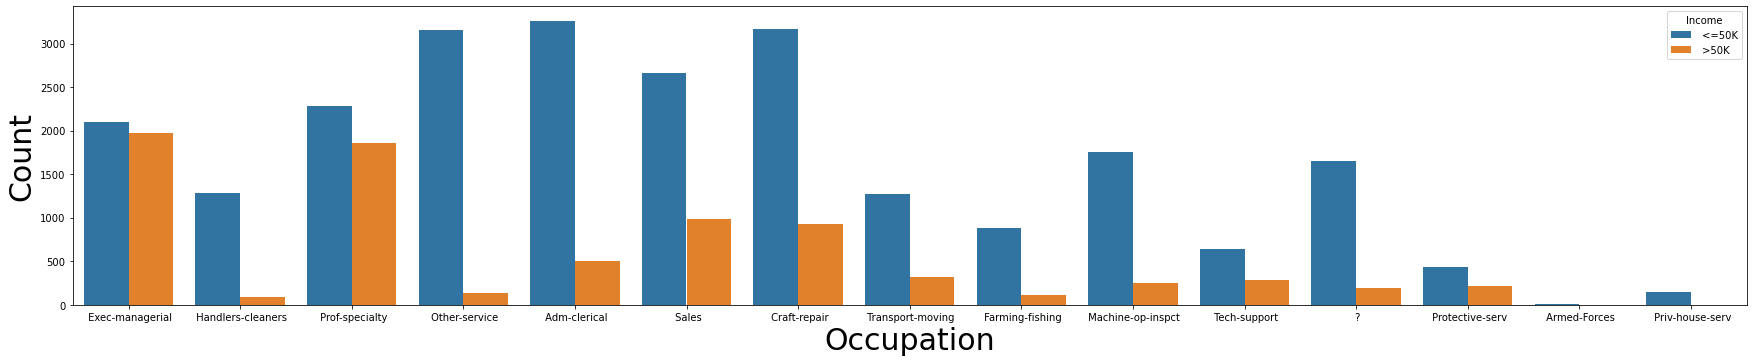

In [36]:
plt.figure(figsize=(30,45),facecolor='white')
plot_number2=1
x_plot2 = df[['Occupation']]
y_plot2 = df['Income']
for i in x_plot2:
    if plot_number2<=len(x_plot2.columns):
        ax2=plt.subplot(7,1,plot_number2)
        sns.countplot(x_plot2[i], hue=y_plot2)
        plt.xlabel(i,fontsize=30)
        plt.ylabel('Count',fontsize=30)
    plot_number2+=1
plt.show()

Occupation - More number of Exec-Managers earn more than 50K followed by Prof-speciality. Adm-clerical Job people are more in case of earnings less than 50K followed by craft-repair and other-service.

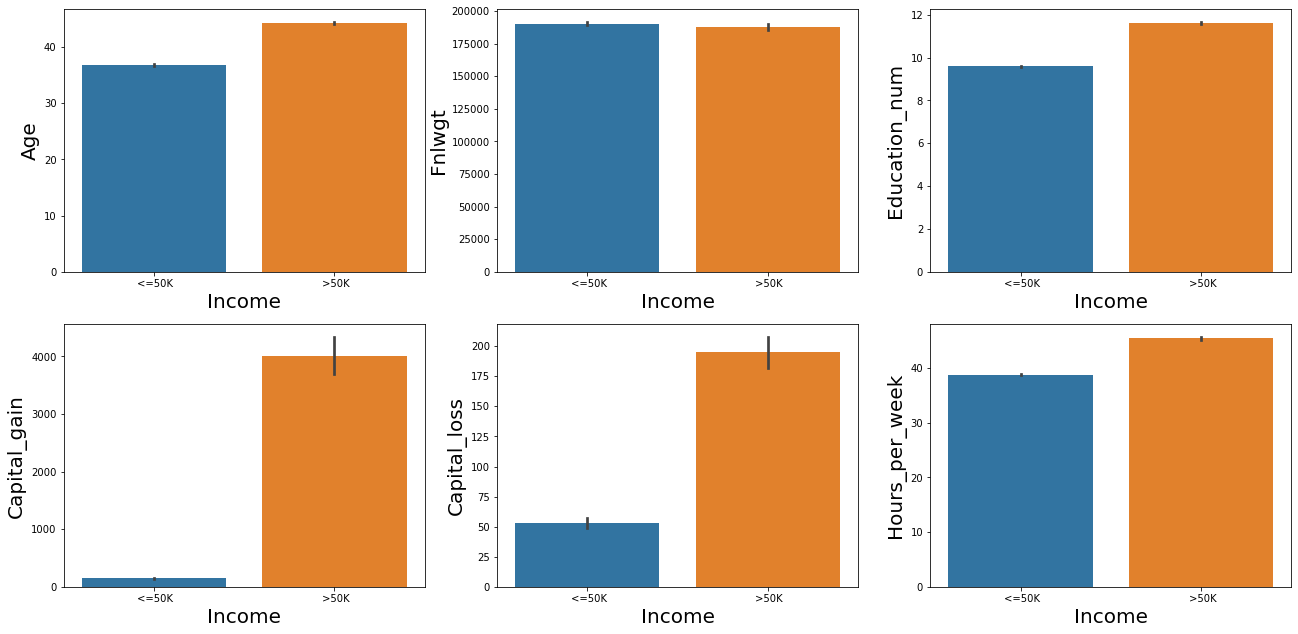

In [37]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
y_plot = df['Income']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Income',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph:

- Age - People with Age greater than 36 are earning >50K.

- Fnlwgt - There is not much difference in case of Fnlwgt with respect to people earning >50K and people earning <50K. This parameter is almost same and doesnt affect much the target variable (Income). So after cross checking the correlation, we can drop this column if needed.

- Education_num - Most of the People with Education_num greater than 9 till 16 earn >50K

- Capital_gain - Most of the People with higher Capital_gain earn >50K

- Capital_loss - Most of the People with higher Capital_gain earn >50K too. We can keep the threshold as 50

- Hours_per_week - Most of the People with Hours_per_week greater than 39 earn >50K

In [38]:
pd.crosstab(df.Native_country, df.Income)

Income,<=50K,>50K
Native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


People with United-States native are more in both earning case due to its higher majority in overall population in given dataset.

## Encoding the Categorical Data

In [39]:
pd.crosstab(df.Education, df.Education_num)

Education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


From the above analysis, we can observe that each Education Column data is represented under Education_num column.

All the 16 types of Education Column values is represented in Education_num Column (1 to 16)

In [40]:
df=df.drop(columns=['Education'])

Education Column data is already in Education_num column in different format so dropping the Education Column from the dataset.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])

In [43]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


Checking in new data frame that is the categorical data encoded.

In [45]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


As we can see here all the values are integers now.

In [47]:
corr=df.corr()
corr

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


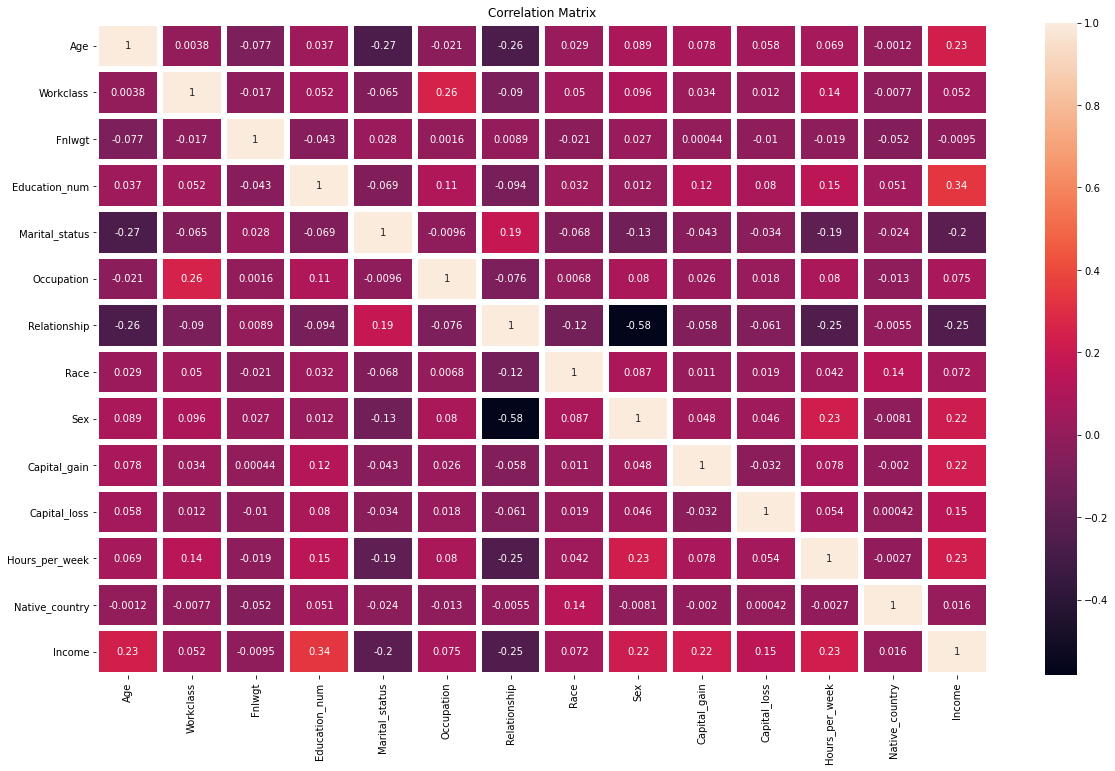

In [51]:
plt.figure(figsize=[20,12])
sns.heatmap(corr,annot=True,linewidths=5)
plt.title("Correlation Matrix")
plt.show()

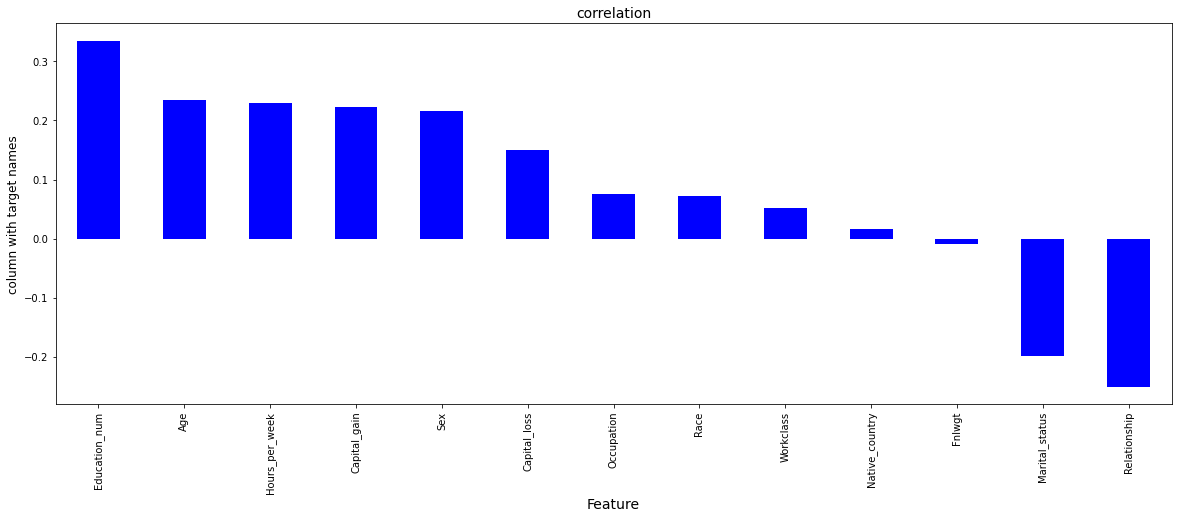

In [52]:
plt.figure(figsize=(20,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=12)
plt.title('correlation',fontsize=14)
plt.show()

The columns marital status and Relationshiop ar negatively corelated while others are positively corelated.

### Seperating targer and feature columns

In [53]:
x = df.drop(columns=['Income'])
y = df['Income']

## Checking for outliers through box plot

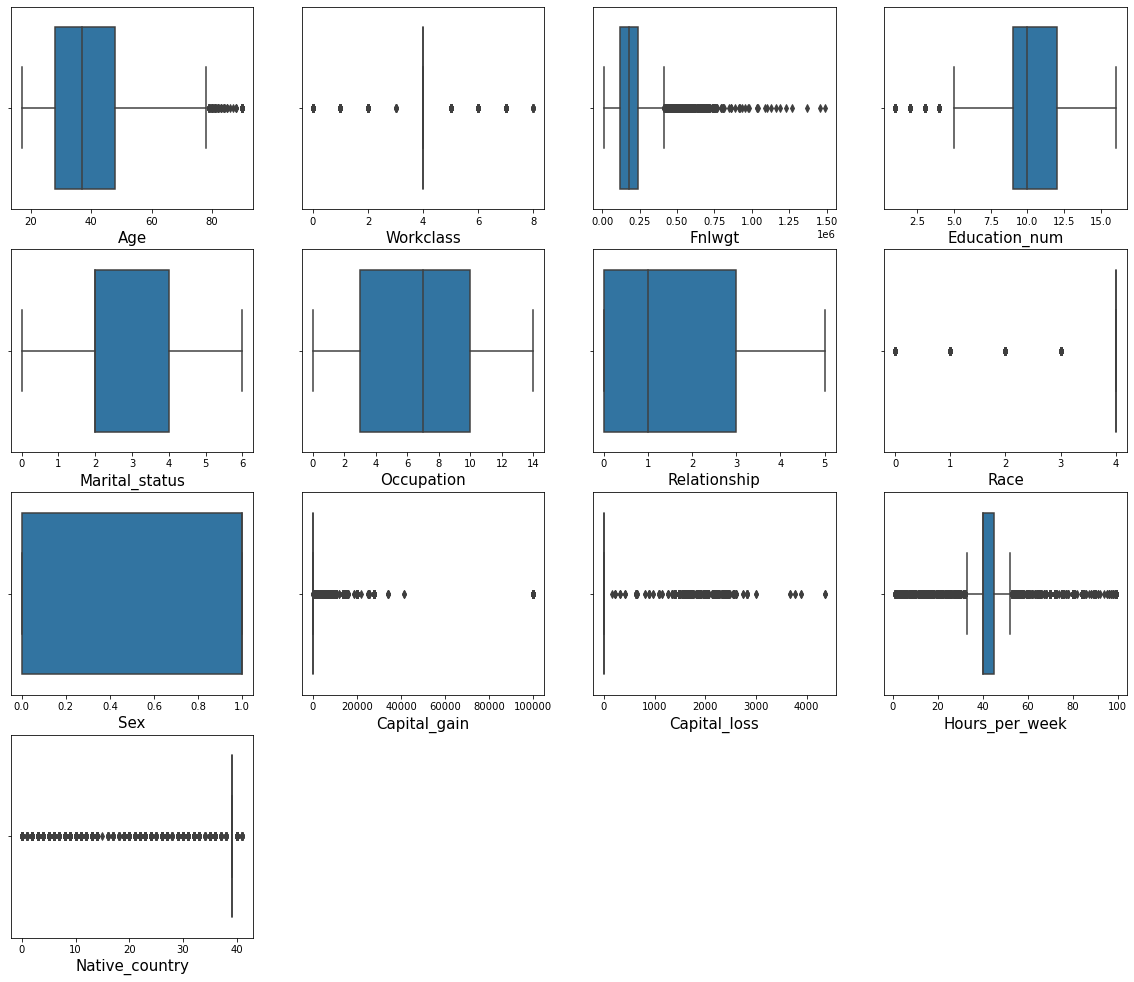

In [56]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x[i])
        plt.xlabel(i,fontsize=15)
    plot_number3+=1
plt.show()

From above plots, we can confirm that there are outliers in Age, Fnlwgt, Education_num, Capitall_gain, Capital_loss, Hours_per_week Column Data

## Removing Outliers

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(x[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]))
x_zscore=x[(z<3).all(axis=1)]

Applied zscore method to remove outlier.

In [61]:
x_zscore.shape

(29827, 13)

In [62]:
x.shape

(32560, 13)

In [63]:
zscore_data_loss=((32560-29827)/32560)*100
zscore_data_loss

8.393734643734643

The data loss is around 8.39% which is within the acceptable range.

## Merging the Outlier Removed Feature Data Set with Orignal Data Set

In [64]:
drop_index = df.index.difference(x_zscore.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(29827, 14)

We can see that the target variable is merged with outlier removed feature data set.

## Skewness removal with power transform

In [65]:
df_powertransform = df
df_powertransform

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
29823,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
29824,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
29825,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [66]:
x1 = df_powertransform.drop(columns=['Income'])
y1 = df_powertransform['Income']
y1.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

In [67]:
x1.skew()

Age                0.491112
Workclass         -0.743069
Fnlwgt             0.634168
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.120320
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -3.738803
dtype: float64

In [70]:
from sklearn.preprocessing import power_transform
x1_skew = power_transform(x1)
x1_skew = pd.DataFrame(x1_skew, columns=x1.columns)
x1_skew.skew()

Age               -0.017085
Workclass          0.073698
Fnlwgt            -0.034910
Education_num      0.023097
Marital_status    -0.126892
Occupation        -0.186045
Relationship       0.104598
Race              -2.007700
Sex               -0.680003
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week     0.107834
Native_country    -2.792342
dtype: float64

Some of the columns are in the range of -0.55 to +0.55 range while some are not.

## Checking the skewness on distribution plot

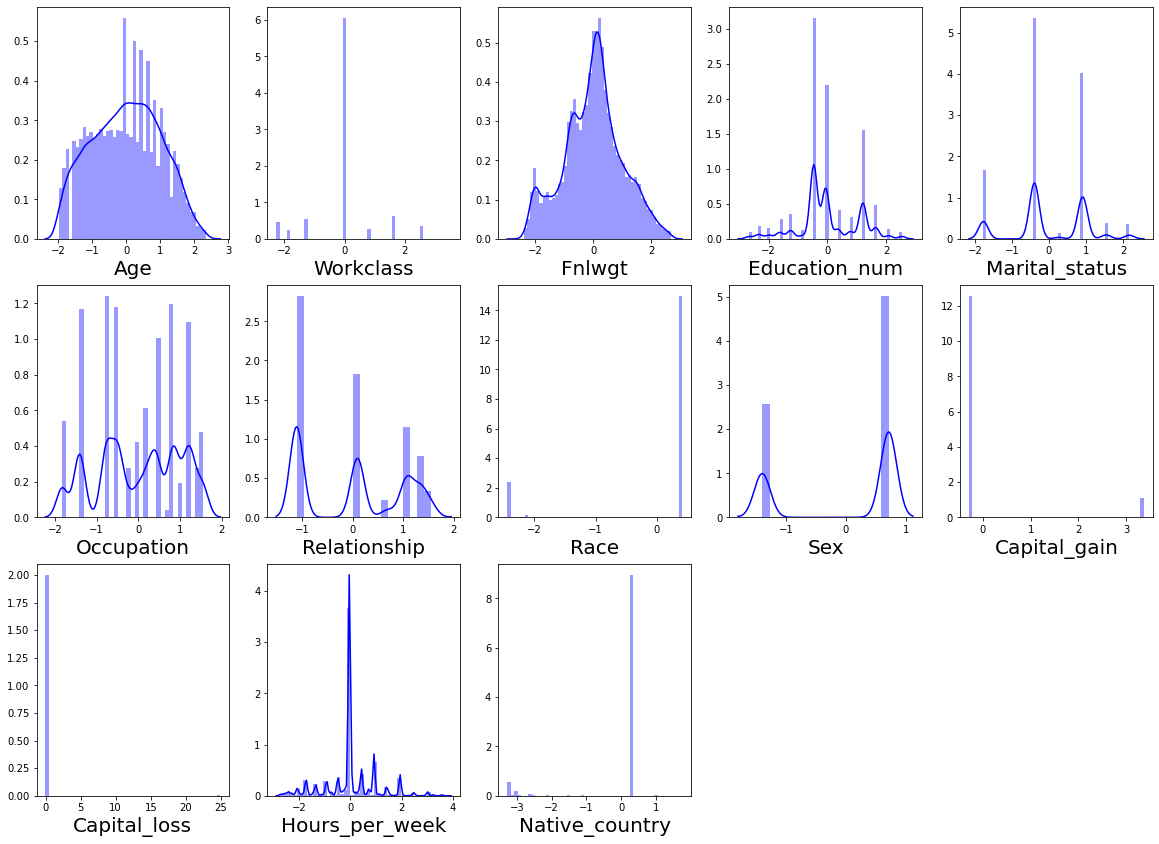

In [72]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x1_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x1_skew[i], color = 'blue')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()


### Feature and Target Selection

In [74]:
x = x1
y = y1
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

## Apply Standard Scaler to check multicollinearity

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.88761523,  1.47512945, -1.07763835, ..., -0.03697188,
        -2.41448122,  0.28554383],
       [-0.0107602 ,  0.0935649 ,  0.32206805, ..., -0.03697188,
         0.0093271 ,  0.28554383],
       [ 1.11220909,  0.0935649 ,  0.5238242 , ..., -0.03697188,
         0.0093271 ,  0.28554383],
       ...,
       [ 1.48653218,  0.0935649 , -0.35206719, ..., -0.03697188,
         0.0093271 ,  0.28554383],
       [-1.20859411,  0.0935649 ,  0.17234014, ..., -0.03697188,
        -1.78608647,  0.28554383],
       [ 1.03734447,  0.78434718,  1.0865837 , ..., -0.03697188,
         0.0093271 ,  0.28554383]])

## Multicollinearity using VIF

In [76]:
vif=pd.DataFrame()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,Age,1.179526
1,Workclass,1.087636
2,Fnlwgt,1.011154
3,Education_num,1.066026
4,Marital_status,1.136656
5,Occupation,1.084073
6,Relationship,1.673540
7,Race,1.037157
8,Sex,1.547720
9,Capital_gain,1.048470


# Model Bulding: Classification Problem

### Finding the best random state

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8135611549691792 on random_state: 50


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)

In [84]:
confusion_matrix_rfc

array([[6667,  536],
       [ 822, 1222]], dtype=int64)

In [85]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7203
           1       0.70      0.60      0.64      2044

    accuracy                           0.85      9247
   macro avg       0.79      0.76      0.78      9247
weighted avg       0.85      0.85      0.85      9247



In [86]:
print(cvs_rfc)

0.854192719346484


In [87]:
print(roc_rfc)

0.7617169596382024


### Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression
lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)

In [89]:
confusion_matrix_lrc

array([[6944,  259],
       [1571,  473]], dtype=int64)

In [90]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7203
           1       0.65      0.23      0.34      2044

    accuracy                           0.80      9247
   macro avg       0.73      0.60      0.61      9247
weighted avg       0.78      0.80      0.76      9247



In [91]:
print(cvs_lrc)

0.7974318568001577


In [92]:
print(roc_lrc)

0.5977258809590372


### Decision Tree Classifier Model

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)

In [94]:
confusion_matrix_dtc

array([[6256,  947],
       [ 795, 1249]], dtype=int64)

In [95]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7203
           1       0.57      0.61      0.59      2044

    accuracy                           0.81      9247
   macro avg       0.73      0.74      0.73      9247
weighted avg       0.82      0.81      0.81      9247



In [96]:
print(cvs_dtc)

0.8062159670375774


In [97]:
print(roc_dtc)

0.7397918770527501


### Support Vector Classifier

In [99]:
from sklearn.svm import SVC
sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

In [100]:
confusion_matrix_sv

array([[7198,    5],
       [1746,  298]], dtype=int64)

In [101]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7203
           1       0.98      0.15      0.25      2044

    accuracy                           0.81      9247
   macro avg       0.89      0.57      0.57      9247
weighted avg       0.84      0.81      0.75      9247



In [102]:
print(cvs_sv)

0.8095014470094435


In [103]:
print(roc_sv)

0.5725492041938386


#### K Neighbors Classifier Model

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

In [105]:
confusion_matrix_knn

array([[6697,  506],
       [1499,  545]], dtype=int64)

In [106]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7203
           1       0.52      0.27      0.35      2044

    accuracy                           0.78      9247
   macro avg       0.67      0.60      0.61      9247
weighted avg       0.75      0.78      0.76      9247



In [107]:
print(cvs_knn)

0.7850270223639461


In [109]:
print(roc_knn)

0.5981927716571671


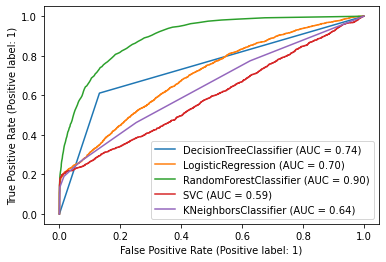

In [110]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, K Nearest Neighbors Classifier Model ranks with least difference and followed by Random Forest Classifier. However, when ROC is analyzed based on the above graph, Random Forest Classifier has best AUC so choosing Random Forest Classifier as Best Model

## Hyper Parameter Tuning

In [111]:
parameters = {'ccp_alpha': np.array([0.05,0.005,0.1,0.01]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [50,100],
             'max_features': ["auto","sqrt"]}

In [112]:
from sklearn.model_selection import GridSearchCV
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [113]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([0.05 , 0.005, 0.1  , 0.01 ]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 100],
                         'max_features': ['auto', 'sqrt']},
             verbose=2)

In [114]:
GridCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.005,
 'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'auto'}

Obtained best parameters from Grid Search CV

## Training the model with the best parameters

In [115]:
Best_model = RandomForestClassifier(ccp_alpha = 0.005, bootstrap = False, criterion = 'entropy', max_depth = 50, max_features = 'sqrt')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

85.16275548826646


#### So we got 85% Accuracy with the Random Forest Classifier for this Model.

In [117]:
import joblib
joblib.dump(Best_model,"Census Income Project.pkl")

['Census Income Project.pkl']